# **Task One : Logistic Regression forBinary ClassificationDescription:**

  * **Description**: Implement a logistic regression model topredict binary outcomes (e.g., whether a customerwill churn).

**Objective**:
  * Load and preprocess the dataset.
  * Train a logistic regression model using sckikit learn.
  * Interpret model coefficients and the odds ratio.
  * Evaluate the model using metrics such as accuracy, precision, recall and the ROC curve.
  * Tools Python, pandas, scikit learn, matplotlib.



## **0.1 Connect to google colab**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/Codveda Technologies')

## **0.2 Setup the device**

In [3]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

## **0.3 Import Dependencies**

In [4]:
import os
import joblib
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import pickle
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve
)
from rich.console import Console
from rich.table import Table
from sklearn.tree import DecisionTreeClassifier, plot_tree

console = Console()

## **1.1 Load Preprocessed Data**

In [5]:
def load_preprocessed(filename: str) -> dict:
    """
    Load preprocessed dataset dictionary from a pickle file.

    Parameters
    ----------
    filename : str
        Path to the saved pickle file.

    Returns
    -------
    dict
        Dictionary containing train/val/test splits.
    """
    filepath = Path(filename)
    if not filepath.exists():
        raise FileNotFoundError(f"❌ File not found: {filepath.resolve()}")

    with open(filepath, "rb") as f:
        data = pickle.load(f)

    print(f"✅ Preprocessed dataset loaded from {filepath.resolve()}")
    return data

In [6]:
loaded_splits = load_preprocessed("/content/drive/MyDrive/Codveda Technologies/data/preprocessed/preprocessed_churn_80.pkl")
X_train, y_train = loaded_splits["X_train"], loaded_splits["y_train"]
X_val, y_val     = loaded_splits["X_val"], loaded_splits["y_val"]
X_test, y_test   = loaded_splits["X_test"], loaded_splits["y_test"]

console.print(f"[cyan]Train Size: {X_train.shape[0]} | Validation Size: {X_val.shape[0]} | Test Size: {X_test.shape[0]}")

✅ Preprocessed dataset loaded from /content/drive/MyDrive/Codveda Technologies/data/preprocessed/preprocessed_churn_80.pkl


Train Size: 1866 | Validation Size: 533 | Test Size: 267

## **1.2 Train Logistic Regression**

In [7]:
def train_logistic_regression(X_train, y_train):
    console.rule("[bold yellow] Training Logistic Regression with Class Weights")
    model = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
    model.fit(X_train, y_train)
    console.print("[green]✅ Logistic Regression model trained with class weights![/green]")
    return model


## **1.3 Evaluation Function**

In [8]:
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    metrics = {}

    for split_name, (X, y) in {
        "Train": (X_train, y_train),
        "Validation": (X_val, y_val),
        "Test": (X_test, y_test)
    }.items():
        y_pred = model.predict(X)

        metrics[split_name] = {
            "Accuracy": accuracy_score(y, y_pred),
            "Precision": precision_score(y, y_pred),
            "Recall": recall_score(y, y_pred),
            "F1-Score": f1_score(y, y_pred)
        }

    # Show Rich Table
    table = Table(title="📊 Logistic Regression Performance", show_lines=True)
    table.add_column("Dataset", style="cyan", justify="center")
    for metric in ["Accuracy", "Precision", "Recall", "F1-Score"]:
        table.add_column(metric, justify="center")

    for split, vals in metrics.items():
        table.add_row(
            split,
            f"{vals['Accuracy']:.3f}",
            f"{vals['Precision']:.3f}",
            f"{vals['Recall']:.3f}",
            f"{vals['F1-Score']:.3f}"
        )
    console.print(table)

    return metrics

## **1.4 Interpret Coefficients (Odds Ratio)**

In [9]:
def interpret_coefficients(model, feature_names):
    coef = model.coef_[0]
    odds_ratios = np.exp(coef)

    coef_df = pd.DataFrame({
        "Feature": feature_names,
        "Coefficient": coef,
        "Odds Ratio": odds_ratios
    }).sort_values(by="Odds Ratio", ascending=False)

    console.rule("[bold magenta] Feature Coefficients & Odds Ratios")
    console.print(coef_df)

    return coef_df

## **1.5 Plot ROC Curve**

In [10]:
def plot_roc(model, X_test, y_test):
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc = roc_auc_score(y_test, y_probs)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=fpr, y=tpr, mode="lines", name=f"ROC Curve (AUC={auc:.3f})"))
    fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode="lines", name="Random Guess", line=dict(dash="dash")))

    fig.update_layout(
        template="plotly_dark",
        title="ROC Curve (Logistic Regression)",
        title_x=0.5,
        xaxis_title="False Positive Rate",
        yaxis_title="True Positive Rate",
        legend=dict(x=0.7, y=0.1)
    )
    fig.show()


In [11]:
model = train_logistic_regression(X_train, y_train)

────────────────────────────────  Training Logistic Regression with Class Weights ─────────────────────────────────

✅ Logistic Regression model trained with class weights!

In [12]:
metrics = evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test)

           📊 Logistic Regression Performance            
┏━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓
┃  Dataset   ┃ Accuracy ┃ Precision ┃ Recall ┃ F1-Score ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩
│   Train    │  0.802   │   0.408   │ 0.801  │  0.540   │
├────────────┼──────────┼───────────┼────────┼──────────┤
│ Validation │  0.777   │   0.370   │ 0.722  │  0.489   │
├────────────┼──────────┼───────────┼────────┼──────────┤
│    Test    │  0.730   │   0.293   │ 0.632  │  0.400   │
└────────────┴──────────┴───────────┴────────┴──────────┘

In [13]:
coef_df = interpret_coefficients(model, X_train.columns)

───────────────────────────────────────  Feature Coefficients & Odds Ratios ───────────────────────────────────────

Feature  Coefficient  Odds Ratio
66  International plan_Yes     2.559079   12.923906
41                State_MT     1.377328    3.964293
55                State_SC     1.289688    3.631652
40                State_MS     1.077190    2.936415
58                State_TX     1.041832    2.834405
..                     ...          ...         ...
29                State_IL    -0.972590    0.378103
67     Voice mail plan_Yes    -1.248802    0.286848
43                State_ND    -1.303014    0.271712
54                State_RI    -1.356645    0.257523
26                State_HI    -1.358515    0.257042

[68 rows x 3 columns]

In [14]:
plot_roc(model, X_test, y_test)

In [15]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42),
    "DecisionTree": DecisionTreeClassifier(max_depth=5, class_weight="balanced", random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42),
}

In [16]:
def evaluate_models(models, X_train, y_train, X_val, y_val, X_test, y_test):
    results = {}
    console.rule("[bold yellow]Model Evaluation")

    table = Table(title="📊 Model Comparison (Churn Prediction)", show_lines=True)
    table.add_column("Model", style="cyan", justify="center")
    for metric in ["Accuracy", "Precision", "Recall", "F1", "AUC"]:
        table.add_column(metric, justify="center")

    for name, model in models.items():
        model.fit(X_train, y_train)

        y_pred = model.predict(X_val)
        y_probs = model.predict_proba(X_val)[:, 1]

        results[name] = {
            "Accuracy": accuracy_score(y_val, y_pred),
            "Precision": precision_score(y_val, y_pred),
            "Recall": recall_score(y_val, y_pred),
            "F1": f1_score(y_val, y_pred),
            "AUC": roc_auc_score(y_val, y_probs)
        }

        table.add_row(
            name,
            f"{results[name]['Accuracy']:.3f}",
            f"{results[name]['Precision']:.3f}",
            f"{results[name]['Recall']:.3f}",
            f"{results[name]['F1']:.3f}",
            f"{results[name]['AUC']:.3f}"
        )

    console.print(table)
    return results

In [17]:
results = evaluate_models(models, X_train, y_train, X_val, y_val, X_test, y_test)

──────────────────────────────────────────────── Model Evaluation ─────────────────────────────────────────────────

                📊 Model Comparison (Churn Prediction)                
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃       Model        ┃ Accuracy ┃ Precision ┃ Recall ┃  F1   ┃  AUC  ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ LogisticRegression │  0.777   │   0.370   │ 0.722  │ 0.489 │ 0.802 │
├────────────────────┼──────────┼───────────┼────────┼───────┼───────┤
│    DecisionTree    │  0.936   │   0.792   │ 0.772  │ 0.782 │ 0.887 │
├────────────────────┼──────────┼───────────┼────────┼───────┼───────┤
│    RandomForest    │  0.917   │   0.973   │ 0.456  │ 0.621 │ 0.907 │
└────────────────────┴──────────┴───────────┴────────┴───────┴───────┘

Select Best Model

In [18]:
# ------------------------------
best_model_name = max(results, key=lambda m: results[m]["AUC"])
best_model = models[best_model_name]

console.print(f"[bold green]🏆 Best Model: {best_model_name} with AUC={results[best_model_name]['AUC']:.3f}[/bold green]")

🏆 Best Model: RandomForest with AUC=0.907

Save Best Model

In [19]:
save_path = f"/content/drive/MyDrive/Codveda Technologies/models/{best_model_name}_Churn.pkl"
os.makedirs(os.path.dirname(save_path), exist_ok=True)
joblib.dump(best_model, save_path)
console.print(f"[green]💾 Best model saved to: {save_path}[/green]")

💾 Best model saved to: /content/drive/MyDrive/Codveda Technologies/models/RandomForest_Churn.pkl

 Prediction Function

In [20]:
def predict_customer(model, customer_data: dict):
    """
    Predict churn for a single customer.
    customer_data = {"Feature1": value, "Feature2": value, ...}
    """
    df = pd.DataFrame([customer_data])
    pred = model.predict(df)[0]
    probs = model.predict_proba(df)[0]

    result = {
        "Prediction": "Churn" if pred == 1 else "No Churn",
        "Probability_NoChurn": probs[0],
        "Probability_Churn": probs[1]
    }

    # Rich Output
    console.rule("[bold cyan] Customer Prediction")
    table = Table(show_lines=True)
    table.add_column("Outcome", style="magenta")
    table.add_column("Probability", justify="center")

    table.add_row("No Churn", f"{result['Probability_NoChurn']:.3f}")
    table.add_row("Churn", f"{result['Probability_Churn']:.3f}")
    console.print(table)

    return result

In [21]:
example_customer = X_test.iloc[0].to_dict()
console.print("[bold yellow]🔎 Example Prediction for First Test Customer:[/bold yellow]")
prediction_result = predict_customer(best_model, example_customer)
console.print(f"[bold green]✅ Final Prediction: {prediction_result['Prediction']}[/bold green]")

🔎 Example Prediction for First Test Customer:

──────────────────────────────────────────────  Customer Prediction ───────────────────────────────────────────────

┏━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Outcome  ┃ Probability ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ No Churn │    0.960    │
├──────────┼─────────────┤
│ Churn    │    0.040    │
└──────────┴─────────────┘

✅ Final Prediction: No Churn

In [22]:
def compare_predictions(model, X, y_true, n_correct=5, n_wrong=5):
    """
    Compare actual vs predicted results.
    Shows 'n_correct' correctly classified samples and 'n_wrong' misclassified samples.
    """
    y_pred = model.predict(X)

    # Find correct and wrong indices
    correct_idx = np.where(y_pred == y_true)[0]
    wrong_idx = np.where(y_pred != y_true)[0]

    console.rule("[bold cyan]Prediction Comparison")
    console.print(f"[green]✅ Correct Predictions: {len(correct_idx)}[/green]")
    console.print(f"[red]❌ Wrong Predictions: {len(wrong_idx)}[/red]")

    # Rich table
    table = Table(title="🔍 Sample Predictions", show_lines=True)
    table.add_column("Index", justify="center")
    table.add_column("Actual", justify="center", style="cyan")
    table.add_column("Predicted", justify="center", style="magenta")
    table.add_column("Correct?", justify="center")

    # Show correct samples
    for idx in correct_idx[:n_correct]:
        table.add_row(str(idx), str(y_true[idx]), str(y_pred[idx]), "[green]✔[/green]")

    # Show wrong samples
    for idx in wrong_idx[:n_wrong]:
        table.add_row(str(idx), str(y_true[idx]), str(y_pred[idx]), "[red]✘[/red]")

    console.print(table)

    # Optional: Plot summary
    summary_df = pd.DataFrame({
        "Result": ["Correct", "Wrong"],
        "Count": [len(correct_idx), len(wrong_idx)]
    })

    fig = px.bar(
        summary_df, x="Result", y="Count", color="Result",
        template="plotly_dark", text="Count",
        title="Prediction Summary",
    )
    fig.update_layout(title_x=0.5)
    fig.show()

    return correct_idx, wrong_idx

In [23]:
# Compare predictions on Test Set
correct_idx, wrong_idx = compare_predictions(best_model, X_test.values, y_test.values, n_correct=10, n_wrong=5)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



────────────────────────────────────────────── Prediction Comparison ──────────────────────────────────────────────

✅ Correct Predictions: 247

❌ Wrong Predictions: 20

          🔍 Sample Predictions          
┏━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Index ┃ Actual ┃ Predicted ┃ Correct? ┃
┡━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩
│   0   │ False  │   False   │    ✔     │
├───────┼────────┼───────────┼──────────┤
│   1   │ False  │   False   │    ✔     │
├───────┼────────┼───────────┼──────────┤
│   2   │ False  │   False   │    ✔     │
├───────┼────────┼───────────┼──────────┤
│   4   │ False  │   False   │    ✔     │
├───────┼────────┼───────────┼──────────┤
│   5   │ False  │   False   │    ✔     │
├───────┼────────┼───────────┼──────────┤
│   6   │ False  │   False   │    ✔     │
├───────┼────────┼───────────┼──────────┤
│   7   │ False  │   False   │    ✔     │
├───────┼────────┼───────────┼──────────┤
│   8   │ False  │   False   │    ✔     │
├───────┼────────┼───────────┼──────────┤
│   9   │ False  │   False   │    ✔     │
├───────┼────────┼───────────┼──────────┤
│  10   │ False  │   False   │    ✔     │
├───────┼────────┼───────────┼──────────┤
│   3   │  True  │   False   │    ✘     │
├───────┼────────┼───────────┼──────────┤
│  40   │  True  │   False   │    ✘     │
├───────┼────────┼───────────┼──────────┤
│  41   │  True  │   False   │    ✘     │
├───────┼────────┼───────────┼──────────┤
│  64   │  True  │   False   │    ✘     │
├───────┼────────┼───────────┼──────────┤
│  90   │  True  │   False   │    ✘     │
└───────┴────────┴───────────┴──────────┘

# **Task Two : Decision Trees forClassification**

  * **Description**: Build a decision tree classifier to predicta categorical outcome (e.g., predict species offlowers).

  
**Objective**:
  * Train a decision tree on a labeled dataset (e.g. the iris dataset).
  * Visualize the tree structure.
  * Prune the tree to prevent overfitting.
  * Evaluate the model using classification metrics such as accuracy and F1-score.
  * Tools: Python, scikit learn, pandas, matplotlib.


## **2.1 Load Preprocessed Data**

In [24]:
loaded_splits = load_preprocessed("/content/drive/MyDrive/Codveda Technologies/data/preprocessed/preprocessed_iris.pkl")
X_train, y_train = loaded_splits["X_train"], loaded_splits["y_train"]
X_val, y_val     = loaded_splits["X_val"], loaded_splits["y_val"]
X_test, y_test   = loaded_splits["X_test"], loaded_splits["y_test"]

console.print(f"[cyan]Train Size: {X_train.shape[0]} | Validation Size: {X_val.shape[0]} | Test Size: {X_test.shape[0]}")

✅ Preprocessed dataset loaded from /content/drive/MyDrive/Codveda Technologies/data/preprocessed/preprocessed_iris.pkl


Train Size: 102 | Validation Size: 15 | Test Size: 30

## **2.2 Train + Evaluate Decision Trees**

In [25]:
def train_decision_trees(X_train, y_train, X_val, y_val, depths=[None, 3, 5]):
    results = {}
    models = {}

    table = Table(title="🌳 Decision Tree Evaluation (Validation Set)", show_lines=True)
    table.add_column("Max Depth", style="cyan", justify="center")
    for metric in ["Accuracy", "Precision", "Recall", "F1"]:
        table.add_column(metric, justify="center")

    for d in depths:
        model = DecisionTreeClassifier(max_depth=d, random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_val)
        results[d] = {
            "Accuracy": accuracy_score(y_val, y_pred),
            "Precision": precision_score(y_val, y_pred, average="weighted"),
            "Recall": recall_score(y_val, y_pred, average="weighted"),
            "F1": f1_score(y_val, y_pred, average="weighted")
        }

        table.add_row(
            str(d) if d else "Unpruned",
            f"{results[d]['Accuracy']:.3f}",
            f"{results[d]['Precision']:.3f}",
            f"{results[d]['Recall']:.3f}",
            f"{results[d]['F1']:.3f}"
        )

        models[d] = model

    console.print(table)
    return models, results

In [26]:
models, results = train_decision_trees(X_train, y_train, X_val, y_val)

    🌳 Decision Tree Evaluation (Validation Set)     
┏━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃ Max Depth ┃ Accuracy ┃ Precision ┃ Recall ┃  F1   ┃
┡━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ Unpruned  │  1.000   │   1.000   │ 1.000  │ 1.000 │
├───────────┼──────────┼───────────┼────────┼───────┤
│     3     │  1.000   │   1.000   │ 1.000  │ 1.000 │
├───────────┼──────────┼───────────┼────────┼───────┤
│     5     │  1.000   │   1.000   │ 1.000  │ 1.000 │
└───────────┴──────────┴───────────┴────────┴───────┘

## **2.3  Select Best Model**

In [27]:
best_depth = max(results, key=lambda d: results[d]["F1"])
best_model = models[best_depth]

console.print(f"[bold green]🏆 Best Model: Max Depth={best_depth} with F1={results[best_depth]['F1']:.3f}[/bold green]")

🏆 Best Model: Max Depth=None with F1=1.000

## **2.4 Evaluate on Test Set**

In [28]:
y_pred_test = best_model.predict(X_test)
console.rule("[bold yellow]Test Set Performance")
console.print(classification_report(y_test, y_pred_test))

────────────────────────────────────────────── Test Set Performance ───────────────────────────────────────────────

precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

## **2.5 Visualize Decision Tree**

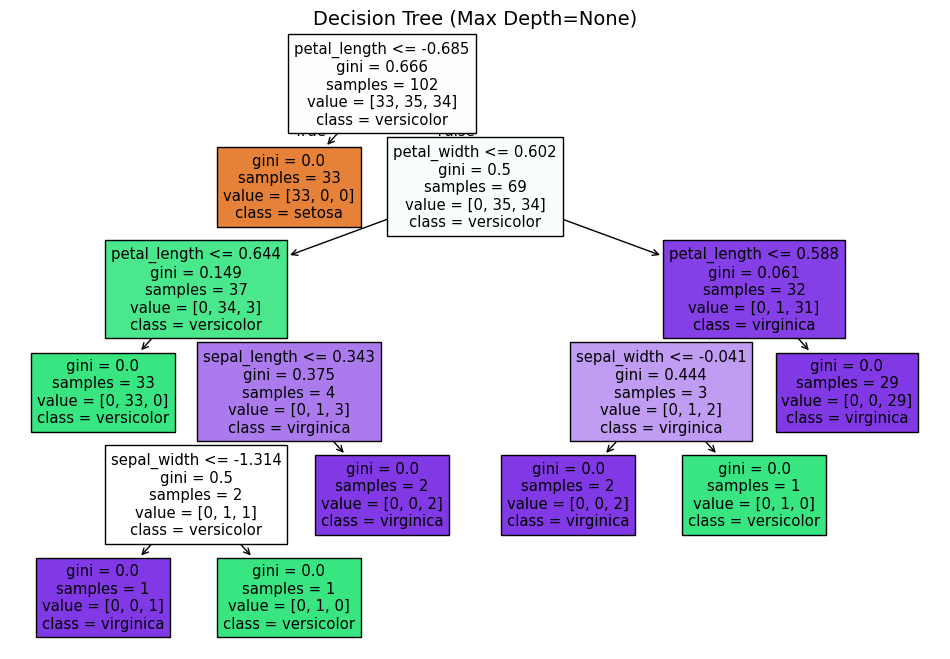

In [29]:
plt.figure(figsize=(12, 8))
plot_tree(best_model, feature_names=X_train.columns, class_names=best_model.classes_, filled=True)
plt.title(f"Decision Tree (Max Depth={best_depth})", fontsize=14)
plt.show()

## **2.6 Feature Importance**

In [30]:
importances = best_model.feature_importances_
imp_df = pd.DataFrame({"Feature": X_train.columns, "Importance": importances}).sort_values(by="Importance", ascending=False)

fig = px.bar(
    imp_df, x="Feature", y="Importance", text="Importance",
    template="plotly_dark", title="Feature Importance (Decision Tree)"
)
fig.update_layout(title_x=0.5)
fig.show()

## **2.7 Save Best Model**

In [31]:
save_path = f"/content/drive/MyDrive/Codveda Technologies/models/DecisionTree_Iris.pkl"
os.makedirs(os.path.dirname(save_path), exist_ok=True)
joblib.dump(best_model, save_path)
console.print(f"[green]💾 Model saved at {save_path}[/green]")

💾 Model saved at /content/drive/MyDrive/Codveda Technologies/models/DecisionTree_Iris.pkl

## **2.8 Prediction Function**

In [32]:
def predict_flower(model, flower_data: dict):
    """
    Predict iris species from flower measurements.
    Example: {"sepal length": 5.1, "sepal width": 3.5, "petal length": 1.4, "petal width": 0.2}
    """
    df = pd.DataFrame([flower_data])
    pred = model.predict(df)[0]
    probs = model.predict_proba(df)[0]

    console.rule("[bold cyan]🌸 Flower Prediction")
    table = Table(show_lines=True)
    table.add_column("Species", style="magenta")
    table.add_column("Probability", justify="center")

    for cls, p in zip(best_model.classes_, probs):
        table.add_row(cls, f"{p:.3f}")

    console.print(table)
    console.print(f"[bold green]✅ Predicted Species: {pred}[/bold green]")

    return pred, probs

In [33]:
example_flower = X_test.iloc[0].to_dict()
predict_flower(best_model, example_flower)

────────────────────────────────────────────── 🌸 Flower Prediction ───────────────────────────────────────────────

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Species    ┃ Probability ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ setosa     │    0.000    │
├────────────┼─────────────┤
│ versicolor │    1.000    │
├────────────┼─────────────┤
│ virginica  │    0.000    │
└────────────┴─────────────┘

✅ Predicted Species: versicolor

('versicolor', array([0., 1., 0.]))

# **Task Three : K-Means Clustering**

  * **Description**: Implement K-Means clustering to groupunlabeled data into clusters (e.g., customersegmentation).

  
**Objective**:
  * Load a dataset and preprocess it (scaling).
  * Apply K-Means clustering and determine the optimal numer of clusters using the elbow method.
  * Visualize clusters using 2D scatter plots.
  * Interpret the clustering results.
  * Tools: Python, scikit-learn, matplotlib, seaborn.



In [34]:
import os
import joblib
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from rich.console import Console
from rich.table import Table

console = Console()

## **3.1 Load Dataset**

In [35]:
df = pd.read_csv("/content/drive/MyDrive/Codveda Technologies/data/2) Stock Prices Data Set.csv")

console.rule("[bold cyan]Raw Data Preview")
console.print(df.head())

──────────────────────────────────────────────── Raw Data Preview ─────────────────────────────────────────────────

symbol        date      open      high       low     close    volume
0    AAL  2014-01-02   25.0700   25.8200   25.0600   25.3600   8998943
1   AAPL  2014-01-02   79.3828   79.5756   78.8601   79.0185  58791957
2    AAP  2014-01-02  110.3600  111.8800  109.2900  109.7400    542711
3   ABBV  2014-01-02   52.1200   52.3300   51.5200   51.9800   4569061
4    ABC  2014-01-02   70.1100   70.2300   69.4800   69.8900   1148391

In [36]:
# Check for duplicates and nans
display(df.isna().sum())
display(df.duplicated().sum())

# Drop empty rows
df.dropna(inplace=True)

# Re-check
display(df.isna().sum())
display(df.duplicated().sum())

symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

np.int64(0)

symbol    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

np.int64(0)

## **3.2 Preprocess (Scaling)**

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.select_dtypes(include=np.number))

console.rule("[bold yellow]Scaling Complete")
console.print(f"Scaled Features Shape: {X_scaled.shape}")

──────────────────────────────────────────────── Scaling Complete ─────────────────────────────────────────────────

Scaled Features Shape: (497461, 5)

## **3.3  Elbow Method + Silhouette**

In [38]:
from sklearn.utils import resample
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [39]:
inertias = []
sil_scores = []
K_range = range(2, 11)

# Take a sample (max 5000) for silhouette score
X_sample = resample(X_scaled, n_samples=min(5000, len(X_scaled)), random_state=42)

console.rule("[bold magenta]Running Elbow & Silhouette (fast mode)")
for k in K_range:
    km = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1024, n_init=5)
    labels = km.fit_predict(X_sample)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_sample, labels))

# Plot Elbow Method
fig_elbow = px.line(
    x=list(K_range), y=inertias, markers=True,
    title="Elbow Method - Inertia vs K", template="plotly_dark"
)
fig_elbow.update_layout(title_x=0.5, xaxis_title="K", yaxis_title="Inertia")
fig_elbow.show()

# Plot Silhouette
fig_sil = px.line(
    x=list(K_range), y=sil_scores, markers=True,
    title="Silhouette Score vs K", template="plotly_dark"
)
fig_sil.update_layout(title_x=0.5, xaxis_title="K", yaxis_title="Silhouette Score")
fig_sil.show()

───────────────────────────────────── Running Elbow & Silhouette (fast mode) ──────────────────────────────────────

In [40]:
# ------------------------------
# Train Final Full KMeans
# ------------------------------
best_k = list(K_range)[np.argmax(sil_scores)]
console.print(f"[bold green]🏆 Best K chosen: {best_k}[/bold green]")

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters

🏆 Best K chosen: 2

In [41]:
console.rule("[bold cyan]Cluster Summary")
table = Table(title="📊 Cluster Sizes & Inertia", show_lines=True)
table.add_column("Cluster", justify="center", style="cyan")
table.add_column("Size", justify="center", style="magenta")

for cluster_id in sorted(df["Cluster"].unique()):
    table.add_row(str(cluster_id), str((df["Cluster"] == cluster_id).sum()))

table.add_row("Inertia", f"{kmeans.inertia_:.2f}")
console.print(table)

───────────────────────────────────────────────── Cluster Summary ─────────────────────────────────────────────────

   📊 Cluster Sizes &   
        Inertia         
┏━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Cluster ┃    Size    ┃
┡━━━━━━━━━╇━━━━━━━━━━━━┩
│    0    │   491370   │
├─────────┼────────────┤
│    1    │    6091    │
├─────────┼────────────┤
│ Inertia │ 1321031.01 │
└─────────┴────────────┘

In [42]:
f1, f2 = df.select_dtypes(include=np.number).columns[:2]

fig_clusters = px.scatter(
    df, x=f1, y=f2, color=df["Cluster"].astype(str),
    template="plotly_dark",
    title=f"KMeans Clusters (k={best_k})",
    symbol=df["Cluster"].astype(str),
    opacity=0.7
)
fig_clusters.update_layout(title_x=0.5)
fig_clusters.show()


In [43]:
save_path_model = "/content/drive/MyDrive/Codveda Technologies/models/KMeans_Customers.pkl"
save_path_scaler = "/content/drive/MyDrive/Codveda Technologies/models/KMeans_Scaler.pkl"
os.makedirs(os.path.dirname(save_path_model), exist_ok=True)

joblib.dump(kmeans, save_path_model)
joblib.dump(scaler, save_path_scaler)

console.print(f"[green]💾 Model saved to: {save_path_model}[/green]")
console.print(f"[green]💾 Scaler saved to: {save_path_scaler}[/green]")

💾 Model saved to: /content/drive/MyDrive/Codveda Technologies/models/KMeans_Customers.pkl

💾 Scaler saved to: /content/drive/MyDrive/Codveda Technologies/models/KMeans_Scaler.pkl

In [44]:
def predict_cluster(model, scaler, sample: dict):
    """
    Predict cluster for a new sample.
    Example: {"Open": 100, "Close": 110, "Volume": 50000}
    """
    df_sample = pd.DataFrame([sample])
    X_scaled = scaler.transform(df_sample)
    cluster = model.predict(X_scaled)[0]

    console.rule("[bold yellow]Cluster Prediction")
    console.print(f"📌 Assigned to Cluster: [bold green]{cluster}[/bold green]")

    return cluster


In [45]:
example = df.drop(columns=["Cluster", "symbol", "date"]).iloc[0].to_dict()
predict_cluster(kmeans, scaler, example)

─────────────────────────────────────────────── Cluster Prediction ────────────────────────────────────────────────

📌 Assigned to Cluster: 0

np.int32(0)

In [46]:
example = df.drop(columns=["Cluster", "symbol", "date"]).iloc[22].to_dict()
predict_cluster(kmeans, scaler, example)

─────────────────────────────────────────────── Cluster Prediction ────────────────────────────────────────────────

📌 Assigned to Cluster: 0

np.int32(0)